In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pl
import seaborn as sns
import pandas as pd
import scipy.stats

In [2]:
pal1 = sns.color_palette('Paired')[0::2][:5]
pal2 = sns.color_palette('Paired')[1::2][:5]
pal3 = sns.color_palette('Dark2')

golden_ratio = (1 + np.sqrt(5))/2

from matplotlib import lines
linestyles = list(lines.lineStyles.keys())[:4]

initial_electron_energy = 'Initial Electron Energy'
drift_depth = 'Drift Depth (cm)'
RMSE = 'RMS Error (mm)'
hue_order = ['50 keV', '300 keV', '500 keV', '750 keV', '1000 keV']

In [ ]:
SAVE_FIGURES = False

### Using the mean of the empirical posterior distribution

In [7]:
df_deterministic = pd.DataFrame(
    {
        initial_electron_energy:
            np.concatenate(
                (
                    np.tile(hue_order, 2),
                    hue_order[1:]
                )
            ),
        drift_depth:
            np.concatenate(
                (
                    np.repeat(1, 5),
                    np.repeat(5, 5),
                    np.repeat(10, 4)
                )
            ),
        RMSE:
            np.sqrt(np.array(
                [
                    0.0004704369584618764,
                    0.02344891882695354,
                    0.047575479857282506,
                    0.09146173075833722,
                    0.24210252850267883,
                    
                    0.0006202093001177541,
                    0.05789972924542975,
                    0.07204653754693598,
                    0.131062998933198,
                    0.281804043036193,
                    
                    0.10092657866144036,
                    0.10819679258432802,
                    0.1632467110427296,
                    0.3487597314592979,
                ]
            ))
    }
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


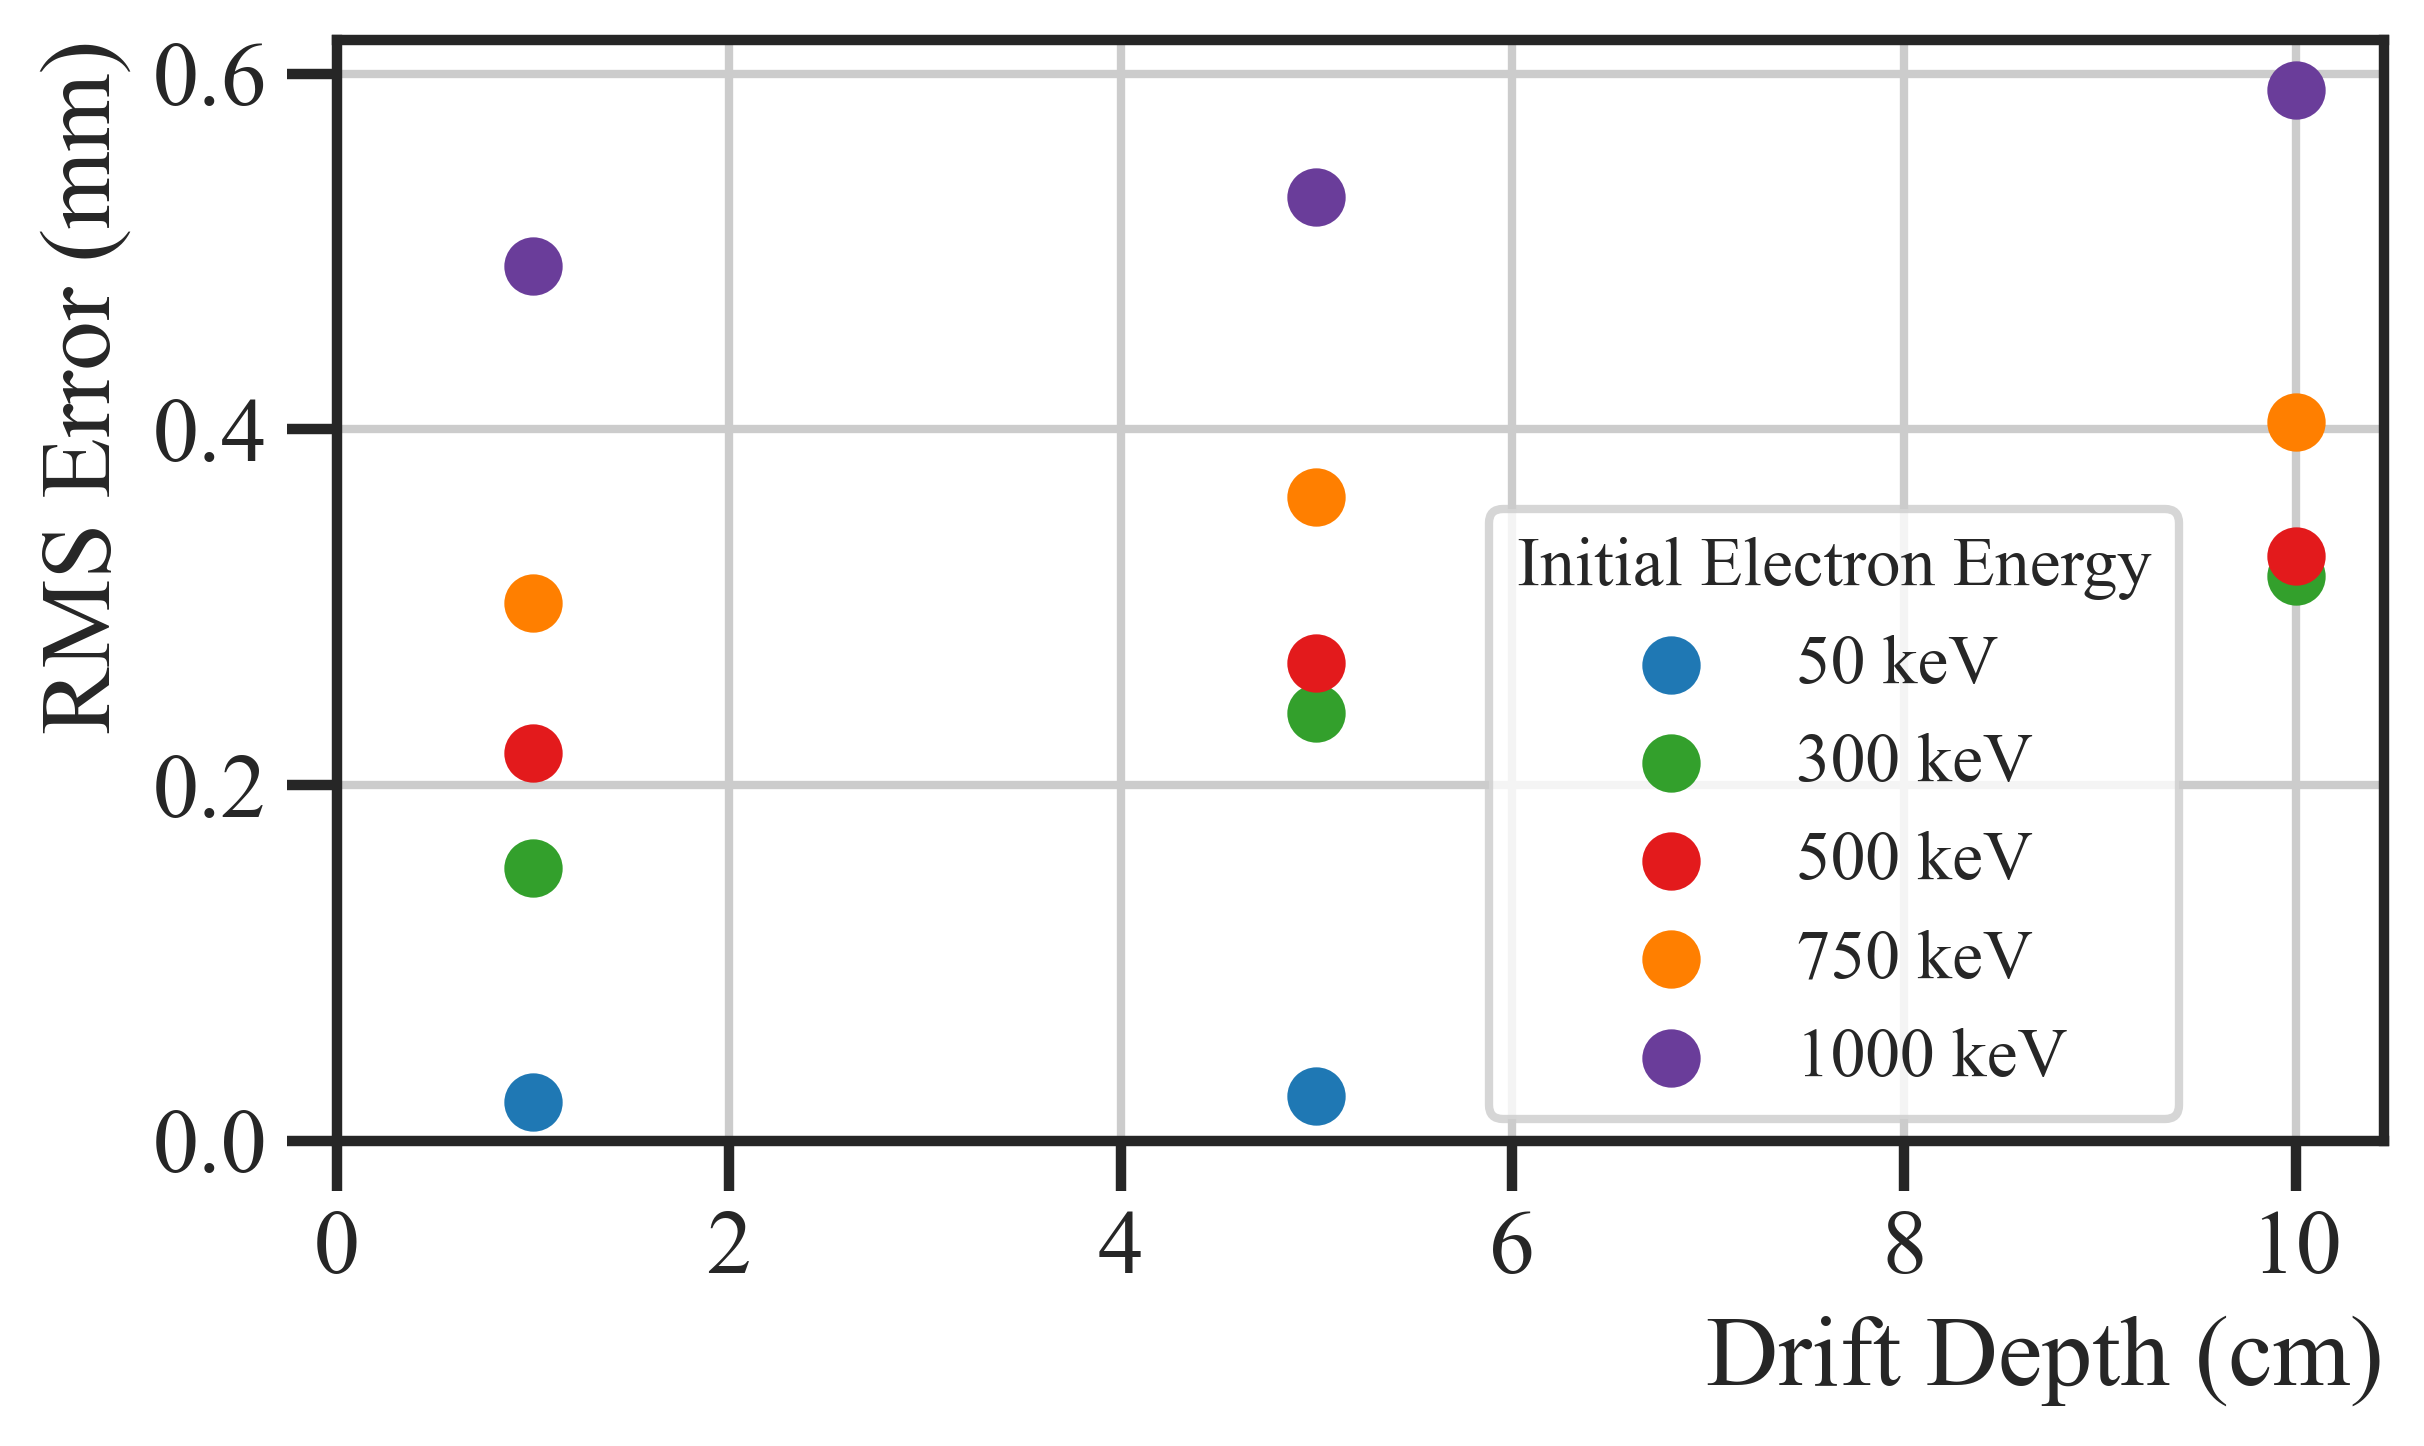

In [8]:
context = "notebook"
style = 'ticks'
fmt = 'png'
fig_dpi = 150
sns.set_theme(context, style)

fig = plt.figure(dpi=fig_dpi, figsize=(6.4, 6.4/golden_ratio))
ax = fig.add_subplot()

from matplotlib import lines
linestyles = list(lines.lineStyles.keys())[:4]

for i in range(len(hue_order)):
    en = hue_order[i]
    df_tmp = df_deterministic[df_deterministic[initial_electron_energy]==en]
    ax.scatter(df_tmp[drift_depth], df_tmp[RMSE], color=pal2[i], label=en)

ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_xlabel(drift_depth, loc='right')
ax.set_ylabel('RMS Error (mm)', loc='top')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, numpoints=1, title=initial_electron_energy, fontsize='x-small', title_fontsize='x-small', bbox_to_anchor=(0.9, 0.02),
                         loc='lower right', borderaxespad=0.)

ax.grid(which='major')
plt.tight_layout()
if SAVE_FIGURES:
    plt.savefig("deterministic_rmse_vs_drift_{0}_{1}.{2}".format(context, style, fmt), format=fmt)

In [10]:
df_edl = pd.DataFrame(
    {
        initial_electron_energy:
            np.concatenate(
                (
                    np.tile(hue_order, 2),
                    hue_order[1:]
                )
            ),
        drift_depth:
            np.concatenate(
                (
                    np.repeat(1, 5),
                    np.repeat(5, 5),
                    np.repeat(10, 4)
                )
            ),
        RMSE:
            np.sqrt(np.array(
                [
                    0.00036755293410692955,
                    0.032653260168288685,
                    0.05509890596874848,
                    0.15452572279034782,
                    0.8592718607410593,
                    
                    0.000368071794720889,
                    0.060790019561077525,
                    0.08983967729292223,
                    0.23741719396713037,
                    0.7865972478056711,
                    
                    0.05779379650336973,
                    0.07134957090618116,
                    0.11027234259855712,
                    0.2433595373056218,
                ])
            )
    }
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


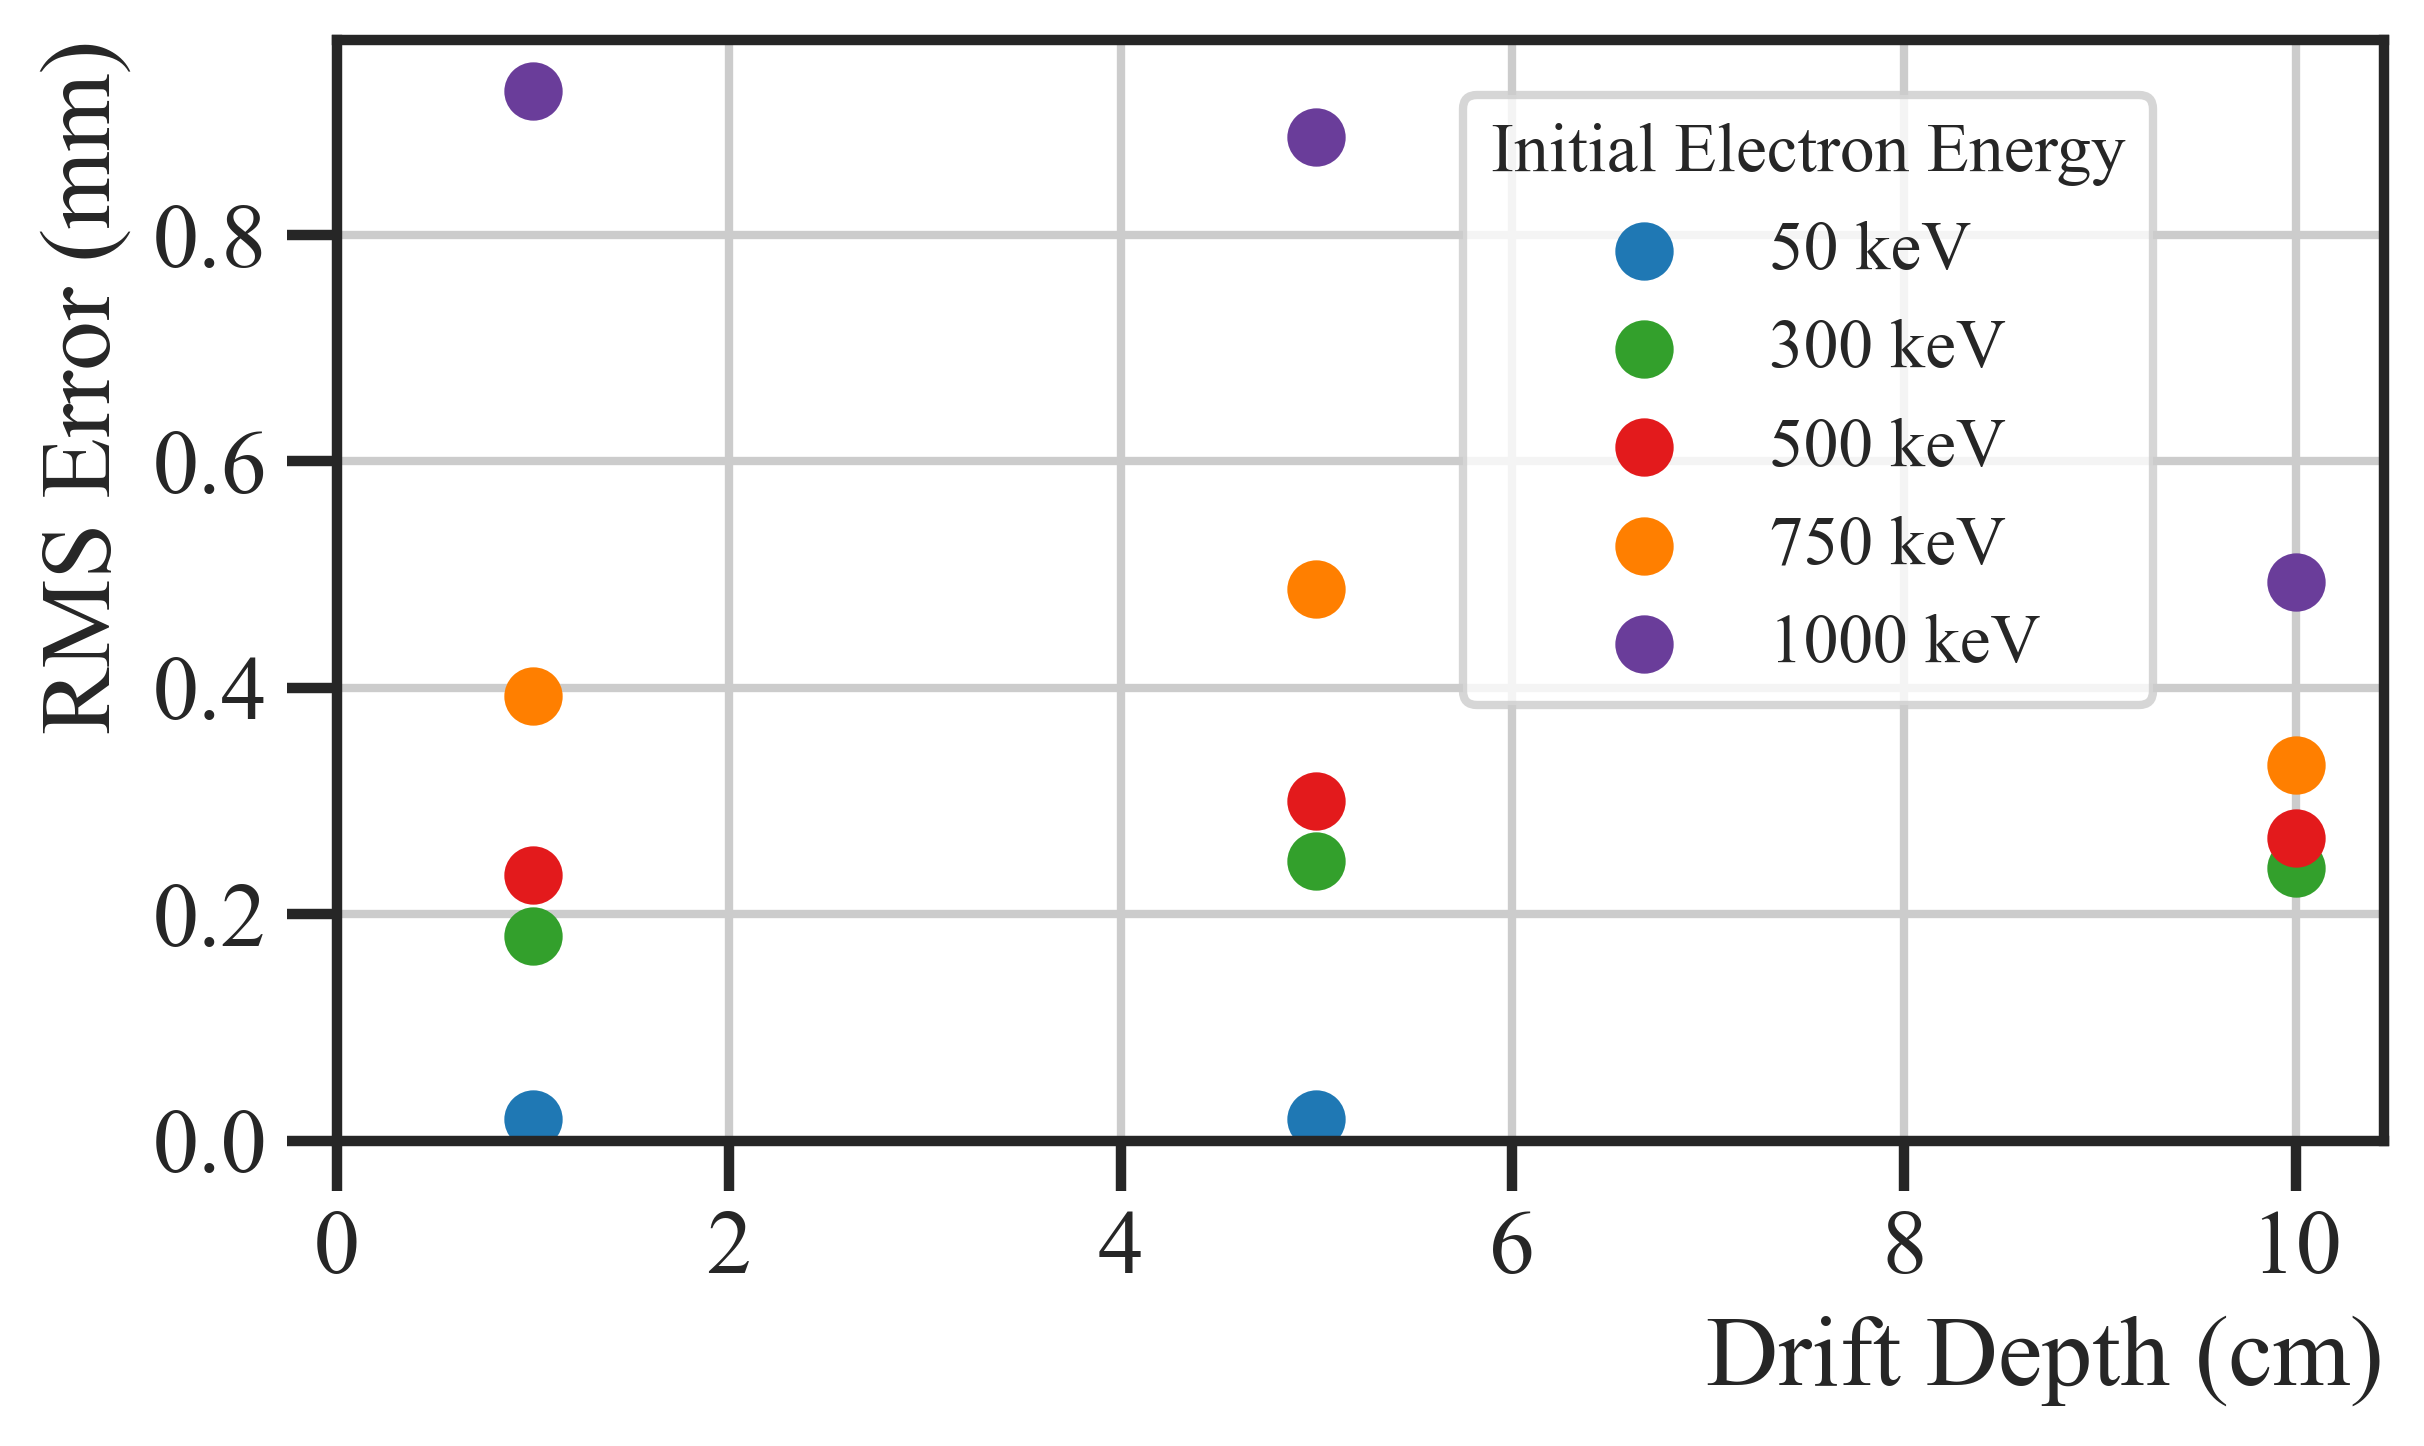

In [11]:
context = "notebook"
style = 'ticks'
fmt = 'png'
fig_dpi = 150
sns.set_theme(context, style)

fig = plt.figure(dpi=fig_dpi, figsize=(6.4, 6.4/golden_ratio))
ax = fig.add_subplot()

from matplotlib import lines
linestyles = list(lines.lineStyles.keys())[:4]

for i in range(len(hue_order)):
    en = hue_order[i]
    df_tmp = df_edl[df_edl[initial_electron_energy]==en]
    ax.scatter(df_tmp[drift_depth], df_tmp[RMSE], color=pal2[i], label=en)

ax.set_xlim([0, ax.get_xlim()[1]])
ax.set_ylim([0, ax.get_ylim()[1]])
ax.set_xlabel(drift_depth, loc='right')
ax.set_ylabel('RMS Error (mm)', loc='top')

handles, labels = ax.get_legend_handles_labels()

ax.legend(handles, labels, numpoints=1, title=initial_electron_energy, fontsize='x-small', title_fontsize='x-small', bbox_to_anchor=(0.55, 0.95),
                         loc='upper left', borderaxespad=0.)

ax.grid(which='major')
plt.tight_layout()
if SAVE_FIGURES:
    plt.savefig("edl_rmse_vs_drift_{0}_{1}.{2}".format(context, style, fmt), format=fmt)

In [12]:
# This file contains data produced by the ComPair plotting library for MEGAlib output: https://github.com/ComPair/python

with open('deterministic_model/drift_5cm_results/deterministic_model_hist_data.pkl', 'rb') as f:
    hist_data = pl.load(f)

In [14]:
dphi = hist_data['dphi']
numberOfBins = hist_data['numberOfBins']
phiRadius = hist_data['phiRadius']
bincenters = hist_data['bincenters']
x1 = hist_data['x1']
x2 = hist_data['x2']
dphi_binned = hist_data['dphi_binned']

In [15]:
optimizedParameters_scipy = scipy.stats.cauchy.fit(dphi)
y_fit_scipy = scipy.stats.cauchy.pdf(bincenters, *optimizedParameters_scipy)*len(dphi)*(bincenters[1]-bincenters[0])
mean_scipy = optimizedParameters_scipy[0]
FWHM_scipy = optimizedParameters_scipy[1]*2

In [16]:
context = "notebook"
style = 'ticks'
fmt = 'png'
fig_dpi = 150
sns.set_theme(context, style)

fig1 = plt.figure(dpi=fig_dpi, figsize=[6.4, 6.4/golden_ratio])
gs1 = fig1.add_gridspec(4,1)
ax11 = fig1.add_subplot(gs1[:3, :])
ax12 = fig1.add_subplot(gs1[3, :])

histogram_angleResults = ax11.hist(dphi, numberOfBins, color='#3e4d8b', alpha=0.9, histtype='stepfilled')
ax11.set_xlim([-1*phiRadius,phiRadius])
ax11.set_ylim([0, ax11.get_ylim()[-1]])
ax11.set_ylabel("Counts", loc='top')

ax11.text(0.03, 0.8, "Mean = %.3f deg\nFWHM = %.3f deg" % (mean_scipy, FWHM_scipy), verticalalignment='bottom', horizontalalignment='left', transform=ax11.transAxes, color='black', fontsize=12)
ax11.plot(bincenters, y_fit_scipy, color='darkred', linewidth=2)
ax11.plot([x1,x2],[np.max(y_fit_scipy)/2.,np.max(y_fit_scipy)/2.], color='darkred', linestyle='--', linewidth=2)

ax12 = fig1.add_subplot(gs1[3, :])
ax12.step(bincenters, dphi_binned-y_fit_scipy, color='#3e4d8b', alpha=0.9)
ax12.plot([bincenters[0],bincenters[-1]], [0,0], color='darkred', linewidth=2, linestyle='--')
ax12.set_xlim([-1*phiRadius,phiRadius])
ax12.set_xlabel('ARM - Compton Cone (deg)')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
if SAVE_FIGURES:
    plt.savefig("det_ARM_{0}_{1}.{2}".format(context, style, fmt), format=fmt)
plt.show()

<ipython-input-16-dc3468ace71f>:24: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax12 = fig1.add_subplot(gs1[3, :])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [93]:
# I attempted to create a Voigt profile inheriting from
# scipy.stats.rv_continuous, but was unable to get it to converge
# successfully, hence the curve fitting

def voigt_func(x, amplitude, offset, sigma, gamma):
    return amplitude * scipy.special.voigt_profile(x - offset, sigma, gamma)

In [120]:
optimizedParameters_scipy, _ = scipy.optimize.curve_fit(voigt_func, bincenters, dphi_binned, p0=[len(dphi), 0, 1, 1], bounds=([0, -np.inf, 0, 0], np.inf))
y_fit_scipy = voigt_func(bincenters, *optimizedParameters_scipy)

amplitude = optimizedParameters_scipy[0]
offset = optimizedParameters_scipy[1]
sigma = optimizedParameters_scipy[2]
gamma = optimizedParameters_scipy[3]

FWHM_gaus = 2*sigma*np.sqrt(2*np.log(2))
FWHM_lorentz = 2*gamma

FWHM_voigt = FWHM_lorentz/2 + np.sqrt(FWHM_lorentz**2/4 + FWHM_gaus**2) # https://en.wikipedia.org/wiki/Voigt_profile#The_width_of_the_Voigt_profile

In [126]:
print('sigma (Gaussian component):', sigma)
print('gamma (Lorentzian component):', gamma)

1.523389700589283

In [123]:
context = "notebook"
style = 'ticks'
fmt = 'png'
fig_dpi = 150
sns.set_theme(context, style)

fig1 = plt.figure(dpi=fig_dpi, figsize=[6.4, 6.4/golden_ratio])
gs1 = fig1.add_gridspec(4,1)
ax11 = fig1.add_subplot(gs1[:3, :])
ax12 = fig1.add_subplot(gs1[3, :])

histogram_angleResults = ax11.hist(dphi, numberOfBins, color='#3e4d8b', alpha=0.9, histtype='stepfilled')
ax11.set_xlim([-1*phiRadius,phiRadius])
ax11.set_ylim([0, ax11.get_ylim()[-1]])
ax11.set_ylabel("Counts", loc='top')

ax11.text(0.03, 0.8, "Median = %.3f deg\nFWHM = %.3f deg" % (offset, FWHM_voigt), verticalalignment='bottom', horizontalalignment='left', transform=ax11.transAxes, color='black', fontsize=12)
x = np.linspace(bincenters[0], bincenters[-1], len(bincenters)*10)
y = voigt_func(bincenters, *optimizedParameters_scipy)
if np.max(y)>ax11.get_ylim()[-1]:
    ax11.set_ylim([0, np.max(y)*1.05])
ax11.plot(bincenters, y, color='darkred', linewidth=2)
ax11.plot([x1,x2],[np.max(y_fit_scipy)/2.,np.max(y_fit_scipy)/2.], color='darkred', linestyle='--', linewidth=2)

ax12 = fig1.add_subplot(gs1[3, :])
ax12.step(bincenters, dphi_binned-y_fit_scipy, color='#3e4d8b', alpha=0.9)
ax12.plot([bincenters[0],bincenters[-1]], [0,0], color='darkred', linewidth=2, linestyle='--')
ax12.set_xlim([-1*phiRadius,phiRadius])
ax12.set_xlabel('ARM - Compton Cone (deg)')

plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)
if SAVE_FIGURES:
    plt.savefig("det_ARM_voigt_{0}_{1}.{2}".format(context, style, fmt), format=fmt)
plt.show()

<ipython-input-123-5ca0136847d5>:28: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax12 = fig1.add_subplot(gs1[3, :])
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
